In [27]:
import pandas as pd
import numpy as np

import sklearn



df = pd.read_csv(r'D:\spam_detector\EEmails.csv', encoding='latin-1')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [29]:

# reanme 

df.rename(columns={'spam': 'target'}, inplace=True)
df

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [30]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [31]:
df['target'].value_counts()

target
0    4360
1    1368
Name: count, dtype: int64

In [39]:
from sklearn.utils import resample



ham = df[df.target == 0]
spam = df[df.target == 1]
ham_downsampled = resample(ham,
                           replace=False,
                           n_samples=2000,
                           random_state=42)

df = pd.concat([ham_downsampled, spam])


In [40]:
df['target'].value_counts()

target
0    2000
1    1368
Name: count, dtype: int64

<Axes: ylabel='count'>

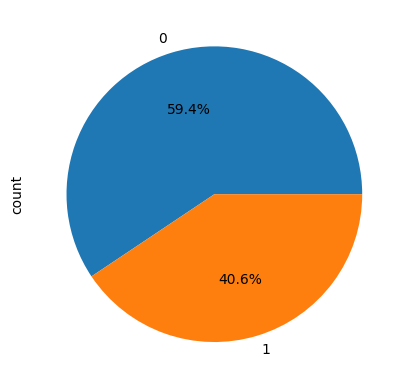

In [84]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%')


In [43]:
import nltk

In [44]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [45]:
df['num_characters'] = df['text'].apply(len)
df['unique_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,text,target,num_characters,unique_words
1547,Subject: interview schedule for jinbaek kim i...,0,1112,275
2730,"Subject: re : wednesday meeting eric , i thi...",0,535,110
4843,Subject: re : london research group i ' d do ...,0,4022,894
2856,"Subject: re : congratulations vince , thanks ...",0,157,30
3804,Subject: osman sezgen steve kromer is request...,0,1795,382
...,...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347,76
1364,Subject: would you like a $ 250 gas card ? do...,1,188,41
1365,"Subject: immediate reply needed dear sir , i...",1,3164,576
1366,Subject: wanna see me get fisted ? fist bang...,1,734,141


In [46]:
#create a funct to lowercase the text , remove punctuations and stop words , tokenise the text
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [48]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import string

In [49]:
# transform function -> to lowercase , remove punctuations and stop words , tokenise the text

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [50]:
df['text'] = df['text'].apply(transform)
df

,text,target,num_characters,unique_words
1547,subject interview schedul jinbaek kim see went...,0,1112,275
2730,subject wednesday meet eric think skip meet di...,0,535,110
4843,subject london research group soon possibl cal...,0,4022,894
2856,subject congratul vinc thank note congratul ba...,0,157,30
3804,subject osman sezgen steve kromer request osma...,0,1795,382
...,...,...,...,...
1363,subject readi get hello viagra 1 med struggl m...,1,347,76
1364,subject would like 250 ga card let current hig...,1,188,41
1365,subject immedi repli need dear sir dr jame ala...,1,3164,576
1366,subject wan na see get fist fist bang show eve...,1,734,141


In [54]:
spam_corpus=[]

for i in df[df['target']==1]['text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

ham_corpus=[]

for i in df[df['target']==0]['text'].tolist():
    for j in i.split():
        ham_corpus.append(j)

In [55]:
len(spam_corpus) , len(ham_corpus)

(174630, 327765)

In [56]:
 #model building 

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [66]:
x= tfidf.fit_transform(df['text']).toarray()
y=df['target']

In [67]:
x

array([[0.04783562, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03570523, 0.04314513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0099152 , 0.02396246, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(3368, 3000))

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB

mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=96)


In [79]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(y_test,y_pred)*100)

96.88427299703264


In [80]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(y_test,y_pred)*100)

98.81305637982196


In [81]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(accuracy_score(y_test,y_pred)*100)

94.80712166172107


In [83]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))